In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='serif')

In [2]:
import phoebe
import numpy as np

# we'll set the random seed so that the noise model is reproducible
np.random.seed(123456789)

# Create fake "observations"

In [3]:
b = phoebe.default_binary()

In [4]:
b.add_dataset('lc', compute_times=phoebe.linspace(0,5,501))

<ParameterSet: 42 parameters | contexts: constraint, figure, compute, dataset>

In [5]:
b.run_compute()

<ParameterSet: 3 parameters | qualifiers: fluxes, comments, times>

In [6]:
times = b.get_value('times@model')
fluxes = b.get_value('fluxes@model') + np.random.normal(size=times.shape) * 0.07 + 0.2*np.sin(times)
sigmas = np.ones_like(fluxes) * 0.05

# Create a New System

In [7]:
b = phoebe.default_binary()

In [8]:
b.add_dataset('lc', times=times, fluxes=fluxes, sigmas=sigmas)

<ParameterSet: 42 parameters | contexts: constraint, figure, compute, dataset>

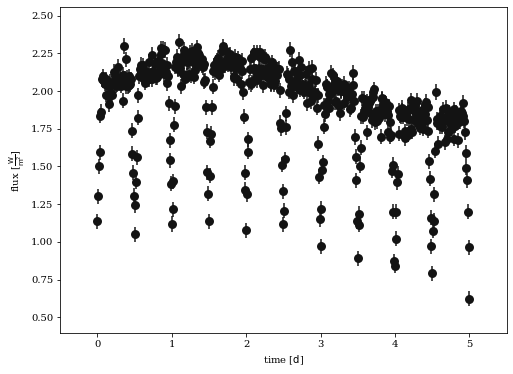

In [9]:
afig, mplfig = b.plot(show=True)

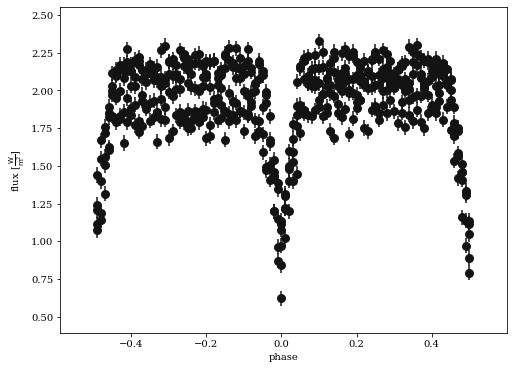

In [10]:
afig, mplfig = b.plot(x='phases', show=True)

In [11]:
b.run_compute(model='withoutGPs')

<ParameterSet: 3 parameters | qualifiers: fluxes, comments, times>

# Add GPs

In [12]:
b.add_gaussian_process(dataset='lc01', kernel='sho')

<ParameterSet: 8 parameters | contexts: compute, feature>

In [13]:
b.add_gaussian_process(dataset='lc01', kernel='matern32')

<ParameterSet: 8 parameters | contexts: compute, feature>

In [15]:
print(b.get_gaussian_process())

ParameterSet: 8 parameters
   kernel@gaussian_process01@f...: sho
   log_S0@gaussian_process01@f...: 0.0
   log_Q@gaussian_process01@fe...: 0.0
   log_omega0@gaussian_process...: 0.0
   kernel@gaussian_process02@f...: matern32
   log_sigma@gaussian_process0...: 0.0
   log_rho@gaussian_process02@...: 0.0
   eps@gaussian_process02@feature: 0.01


# Run Forward Model

In [16]:
b.run_compute(model='withGPs')

<ParameterSet: 5 parameters | qualifiers: fluxes_nogps, gps, fluxes, comments, times>

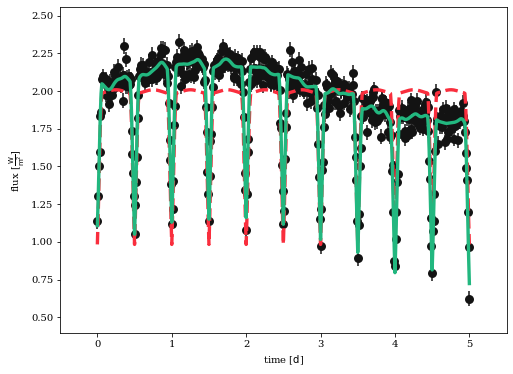

In [17]:
afig, mplfig = b.plot(c={'withoutGPs': 'red', 'withGPs': 'green'},
                      ls={'withoutGPs': 'dashed', 'withGPs': 'solid'},
                      s={'model': 0.03},
                      save='figure_GPs_times.eps', 
                      show=True)

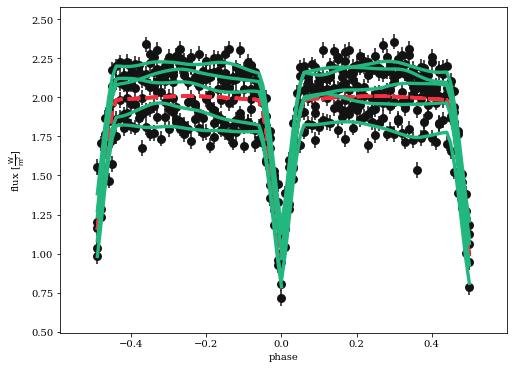

In [22]:
afig, mplfig = b.plot(c={'withoutGPs': 'red', 'withGPs': 'green'},
                      ls={'withoutGPs': 'dashed', 'withGPs': 'solid'},
                      s={'model': 0.03},
                      x='phases', 
                      save='figure_GPs_phases.eps', show=True)